## Imports

In [1]:
#pip install import-ipynb
#!pip install dill


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation.IPython_display import display_animation
# import gym
import scipy.stats as stats
from scipy.stats import norm
from collections import namedtuple
import statistics
import time
import os
from collections import deque
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

import yfinance as yf
import datetime as dt

import pickle
import dill


##Importing environment classes

import import_ipynb
import Generate_Data
import Environment

/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

## Loading Existing Models

Episode 0/1000, Total Reward: -31.773521535000512, P&L: 220.39966583251953, Std Dev P&L: nan
Episode 100/1000, Total Reward: 28.46874587136008, P&L: 18.231964111328125, Std Dev P&L: 308.33567789730495
Episode 200/1000, Total Reward: -931.4786330374159, P&L: -1886.2075805664062, Std Dev P&L: 721.8681278697405
Episode 300/1000, Total Reward: -195.86292094420668, P&L: -523.6839294433594, Std Dev P&L: 736.7622599382012
Episode 400/1000, Total Reward: 25.798747523475857, P&L: 70.90587615966797, Std Dev P&L: 612.1829965033171
Episode 500/1000, Total Reward: 23.893089557874696, P&L: -31.757259368896484, Std Dev P&L: 530.7283124809898
Episode 600/1000, Total Reward: 27.047370682741324, P&L: 27.566194534301758, Std Dev P&L: 714.3410530597585
Episode 700/1000, Total Reward: -113.13325673863083, P&L: -720.0107574462891, Std Dev P&L: 661.2291276223093
Episode 800/1000, Total Reward: -22.715396000336465, P&L: 106.44588470458984, Std Dev P&L: 716.3297592253249
Episode 900/1000, Total Reward: 1.48536

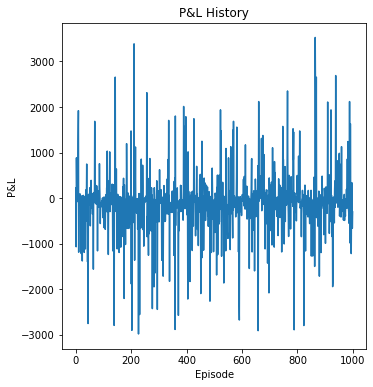

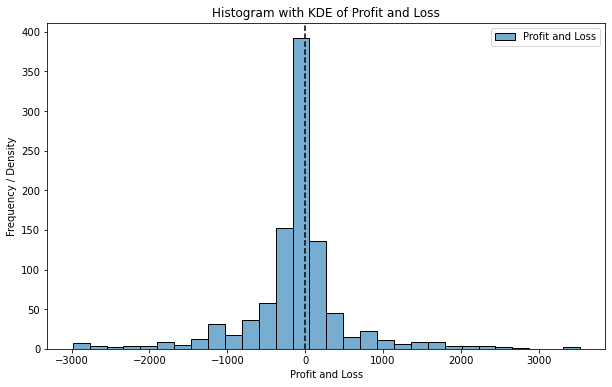

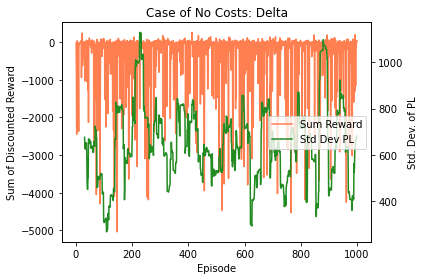

In [3]:
import Delta_Baseline

# Load the agent using dill
with open("models/trained_delta_agent.pkl", "rb") as f:
    delta_agent = dill.load(f)

Episode 0/1000, Total Reward: -1496.2028145312374, P&L: 1949.8085021972656, Std Dev P&L: nan


<string>:87: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)


Episode 100/1000, Total Reward: 15.43800164533762, P&L: -189.5984649658203, Std Dev P&L: 430.86387090689936
Episode 200/1000, Total Reward: -55.11293020448912, P&L: -348.647403717041, Std Dev P&L: 785.9105369021521
Episode 300/1000, Total Reward: -1575.3502515353775, P&L: -677.4497985839844, Std Dev P&L: 668.6681106960885
Episode 400/1000, Total Reward: -44.121817998203, P&L: -52.1697998046875, Std Dev P&L: 715.9992892685898
Episode 500/1000, Total Reward: -53.10778047516597, P&L: -33.08820724487305, Std Dev P&L: 638.4030361789825
Episode 600/1000, Total Reward: -24.21637940054042, P&L: -68.96705627441406, Std Dev P&L: 717.4455927891918
Episode 700/1000, Total Reward: -720.2366562079984, P&L: 723.8754272460938, Std Dev P&L: 547.1679665157291
Episode 800/1000, Total Reward: -2174.848871428193, P&L: -2786.29150390625, Std Dev P&L: 810.54942816744
Episode 900/1000, Total Reward: -30.538109205069226, P&L: 106.44588470458984, Std Dev P&L: 497.24323172520775


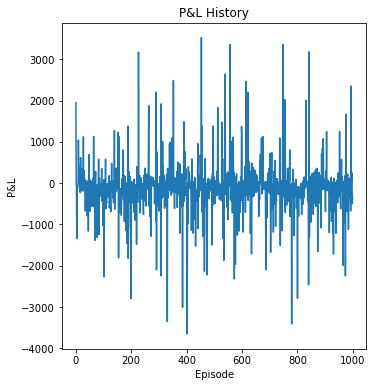

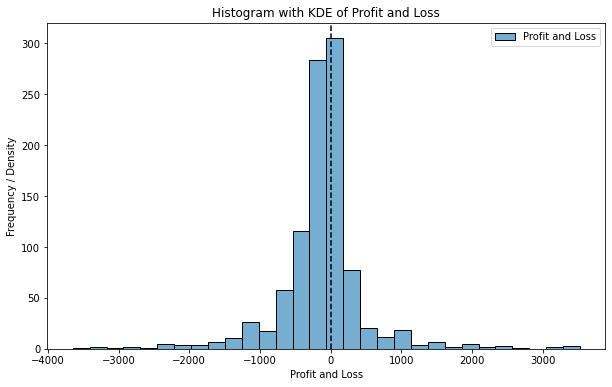

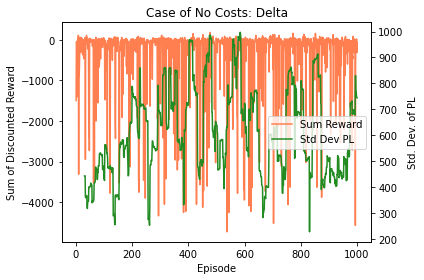

In [4]:
import DQN

# Load the agent using dill
with open("models/dqn_trained_agent.pkl", "rb") as f:
    dqn_agent = dill.load(f)


Episode 0/1000, Total Reward: 35.4023444302314, P&L: 241.16392135620117, Std Dev P&L: nan
Episode 100/1000, Total Reward: -207.33510417336726, P&L: -574.0646362304688, Std Dev P&L: 657.7185162822552
Episode 200/1000, Total Reward: 22.492192740395968, P&L: 330.6549072265625, Std Dev P&L: 708.2209315000882
Episode 300/1000, Total Reward: -3173.5979820500097, P&L: 134.49859619140625, Std Dev P&L: 688.2475093403414
Episode 400/1000, Total Reward: -1181.0377903920821, P&L: 2251.6067504882812, Std Dev P&L: 626.2048238171785
Episode 500/1000, Total Reward: 26.079187419156405, P&L: 11.82260513305664, Std Dev P&L: 501.44505736368706
Episode 600/1000, Total Reward: 43.59573758561149, P&L: -149.80716705322266, Std Dev P&L: 531.4747236938204
Episode 700/1000, Total Reward: 159.3009728817561, P&L: 149.2481231689453, Std Dev P&L: 453.24379926772997
Episode 800/1000, Total Reward: -986.563547424742, P&L: 820.574951171875, Std Dev P&L: 806.8135307777452
Episode 900/1000, Total Reward: 171.149569069405

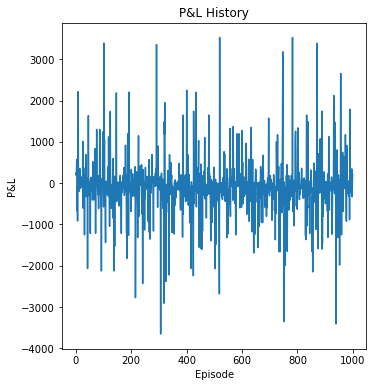

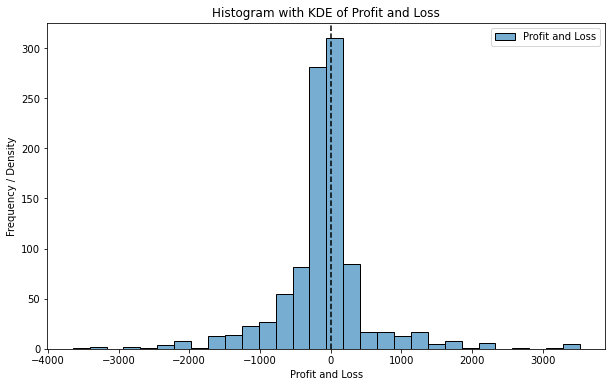

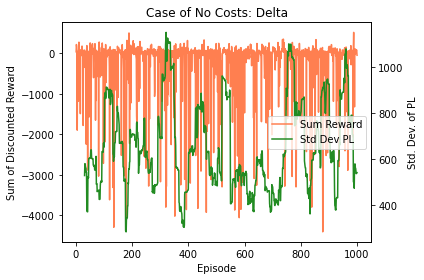

In [5]:
import DDPG

# Load the agent using dill
with open("models/ddpg_agent_full.pkl", "rb") as f:
    ddpg_agent = dill.load(f)

## Testing Suite

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

def test_agent(env, agent, num_episodes, num_steps):
    """
    Test the trained agent in the given environment using unseen data.
    
    Parameters:
    - env: Testing environment with unseen data.
    - agent: The trained agent.
    - num_episodes: Number of episodes to test.
    - num_steps: Number of steps per episode.
    
    Returns:
    - pl_history: List of P&L values for each episode.
    - reward_history: List of total rewards for each episode.
    - std_pl_history: List of standard deviation of P&L over the last 30 episodes, starting from episode 30.
    """
    pl_history = []
    reward_history = []
    std_pl_history = []
    
    # Initialize a list to keep track of the last 30 P&L values
    last_30_pl = []
    
    for episode in range(1, num_episodes + 1):
        state = env.reset()
        
        total_reward = 0
        pl = []

        for step in range(num_steps):
            # Get the action from the trained agent (greedy policy, no exploration)
            action = agent.get_action(state, step=step, episode=episode)

            # Step in the environment
            next_state, reward, done, pv = env.step(action)

            # Accumulate reward
            total_reward += reward
            pl.append(pv)

            if done:
                break
            else:
                state = next_state

        # Calculate total P&L for the episode
        episode_pl = sum(pl)
        pl_history.append(episode_pl)
        reward_history.append(total_reward)
        
        # Update the moving window of the last 30 P&L values
        last_30_pl.append(episode_pl)
        if len(last_30_pl) > 30:
            # Remove the oldest P&L value to maintain the window size
            last_30_pl.pop(0)
        
        # Compute the standard deviation only if we've completed at least 30 episodes
        if episode >= 30:
            std = np.std(last_30_pl)
            std_pl_history.append(std)
        else:
            # Append NaN or any other placeholder for the initial episodes
            std_pl_history.append(np.nan)

        # Optional: Print progress every 100 episodes
        if episode % 100 == 0 or episode == 1:
            print(f"Episode {episode}/{num_episodes} completed.")

    return pl_history, reward_history, std_pl_history


In [7]:
##Getting test datasets
features_test = Generate_Data.features_test
df_stock_test = Generate_Data.df_stock_test
call_options_test = Generate_Data.call_options_test

#Set up your environment with real AAPL stock and option data
env_test = Environment.Environment(
    stock_data=df_stock_test,
    option_data=call_options_test,
    features_data=features_test,
    T=30,
    n_steps=30,
    num_sold_opt=100,
    kappa=0.1,
    alpha=0.001
)

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


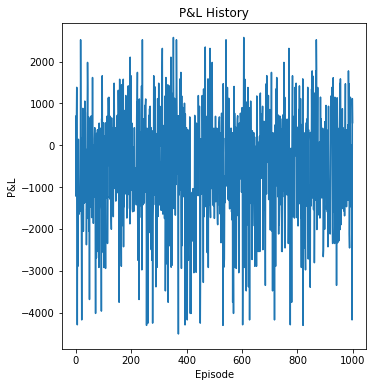

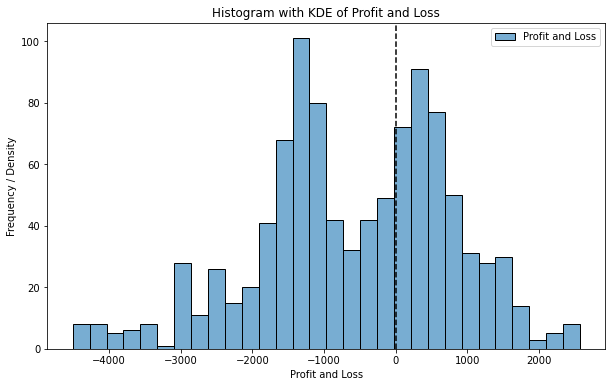

In [8]:
# Test the agent
pl_history_delta, reward_history_delta, std_pl_delta = test_agent(env_test, delta_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_delta)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_delta, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


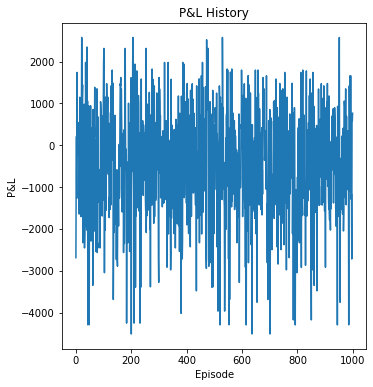

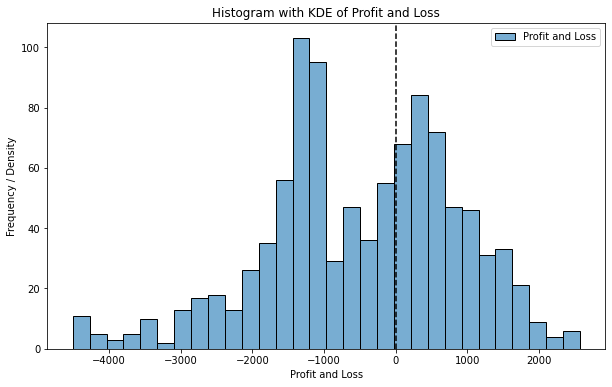

In [9]:
# Test the agent
pl_history_dqn, reward_history_dqn, std_pl_dqn = test_agent(env_test, dqn_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_dqn)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_dqn, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


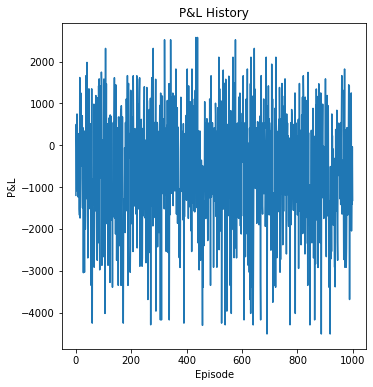

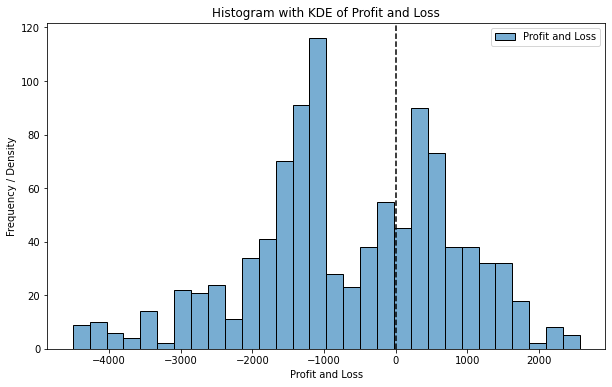

In [10]:
# Test the agent
pl_history_ddpg, reward_history_ddpg, std_pl_ddpg = test_agent(env_test, ddpg_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_ddpg)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

## Combining

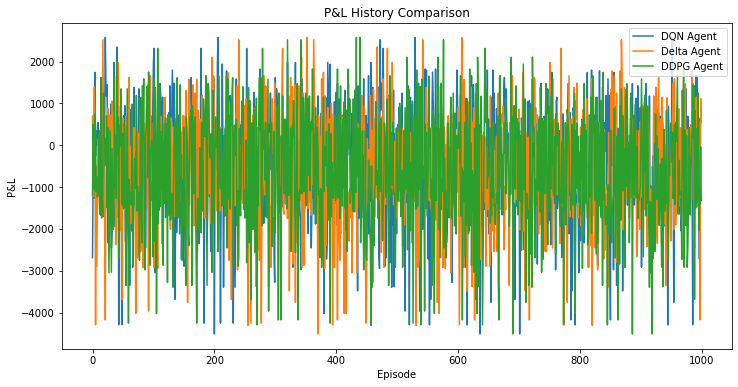

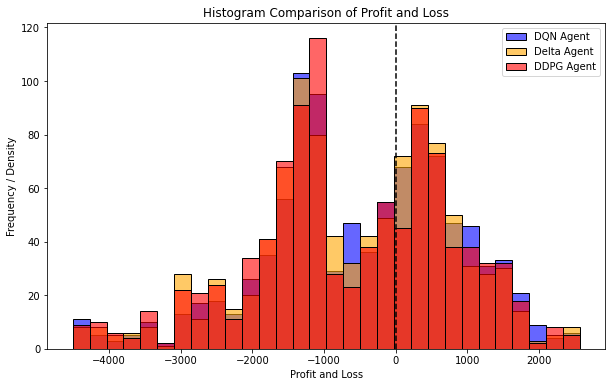

In [11]:
# Plot P&L history comparison
plt.figure(figsize=(12, 6))

# Line plot of P&L histories
plt.plot(pl_history_dqn, label="DQN Agent")
plt.plot(pl_history_delta, label="Delta Agent")
plt.plot(pl_history_ddpg, label="DDPG Agent")

plt.title("P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("P&L")
plt.legend()
plt.show()

# Histogram comparison
plt.figure(figsize=(10, 6))

sns.histplot(pl_history_dqn, kde=False, bins=30, label="DQN Agent", color="blue", alpha=0.6)
sns.histplot(pl_history_delta, kde=False, bins=30, label="Delta Agent", color="orange", alpha=0.6)
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="DDPG Agent", color="red", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram Comparison of Profit and Loss")
plt.legend()
plt.show()

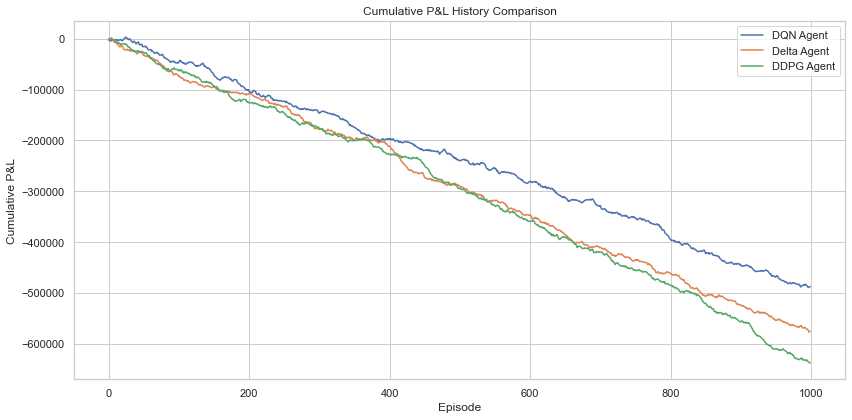

In [12]:
cum_pl_dqn = np.cumsum(pl_history_dqn)
cum_pl_delta = np.cumsum(pl_history_delta)
cum_pl_ddpg = np.cumsum(pl_history_ddpg)

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(cum_pl_dqn, label="DQN Agent")
plt.plot(cum_pl_delta, label="Delta Agent")
plt.plot(cum_pl_ddpg, label="DDPG Agent")

plt.title("Cumulative P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
print(reward_history_ddpg)
print(reward_history_delta)
print(reward_history_dqn)

[-1066.0009420431786, 668.3674833234464, -513.217981535796, -1366.312575892995, -916.9607098716142, -793.7992742674373, -786.4532576355323, 1099.103522565925, 628.959045122928, -577.3408021258065, 905.8041476182651, -473.8003196656995, -314.80895859547843, -419.0151376978224, 314.30660104491477, 457.3719693676826, -353.18768900235955, -355.45204861995745, -837.0741234826728, -243.2532670216455, -543.1711653644295, -1698.1411202118402, -2763.301786481274, -711.6541960297628, -210.79456219209555, -1206.9470826276984, -1129.8759001342166, -2189.4221386157237, -914.1945093778401, -518.2631011767985, -702.6368082675549, -1096.6260086534019, -2849.263030180288, -281.40252626211196, -982.7831131493244, -750.2324335610319, -878.2541294028476, -443.9749871948932, -437.17433693615385, -1163.3551226525685, -759.1693608890959, -939.6985999917813, -1342.7693834276704, -1205.531739651669, 532.8859172140885, -1432.649337583427, -52.61452126798872, -340.3663300639634, -1178.1553179513571, -585.4987865

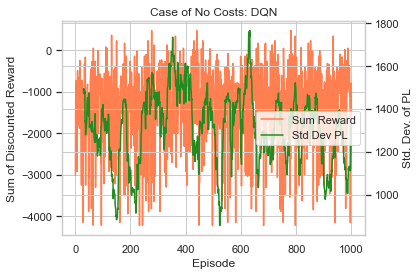

In [14]:
## DELTA
episodes = np.array(list(range(1, len(reward_history_delta) + 1)))

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_delta, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_delta, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()

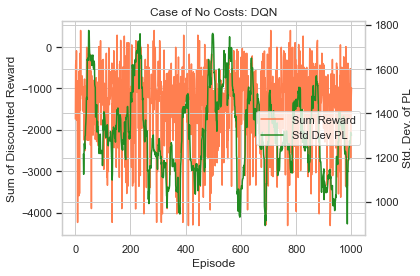

In [15]:
## DQN

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_dqn, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_dqn, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()

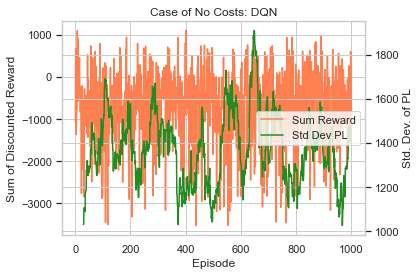

In [16]:
## DDPG

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, reward_history_ddpg, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl_ddpg, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()